In [40]:
path = "C:\\**\\**\\**\\Invistico_Airline\\Invistico_Airline.csv" 

In [ ]:
#https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction dataset has been downloaded from kaggle website

This data given by an airline organization. The actual name of the company is not given due to various purposes that's why the name Invistico airlines.

The dataset consists of the details of customers who have already flown with them. The feedback of the customers on various context and their flight data has been consolidated.

The main purpose of this dataset is to predict whether a future customer would be satisfied with their service given the details of the other parameters values.

Also the airlines need to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers.

In [42]:
import pandas as pd


In [43]:
df=pd.read_csv(path)

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [45]:
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [46]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [48]:
df["Class"].unique() #airlines have three classes

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

<AxesSubplot:>

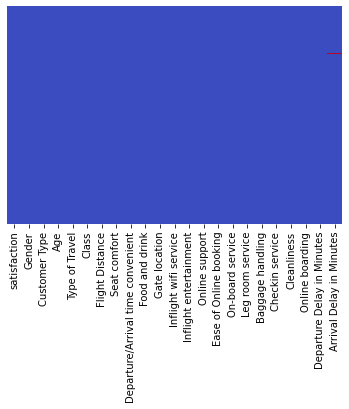

In [49]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="coolwarm")#let's look for null values through heat map

In [50]:
df.isnull().sum() #double check for exact null values for null values

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [11]:
datamiss=["Arrival Delay in Minutes"]
datamiss=df[datamiss]

C:\Users\sharu\AppData\Local\Temp\ipykernel_6820\2984041527.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())#fillna for acolumns with median values

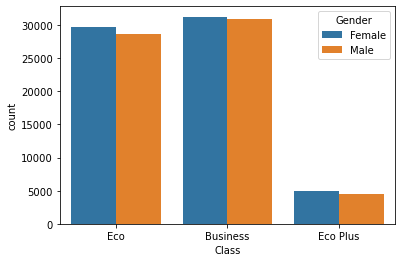

In [54]:
ax=sns.countplot(data=df, x="Class", hue="Gender") #customers prefer to travel in eco and busines class over eco plus

<AxesSubplot:xlabel='Age', ylabel='count'>

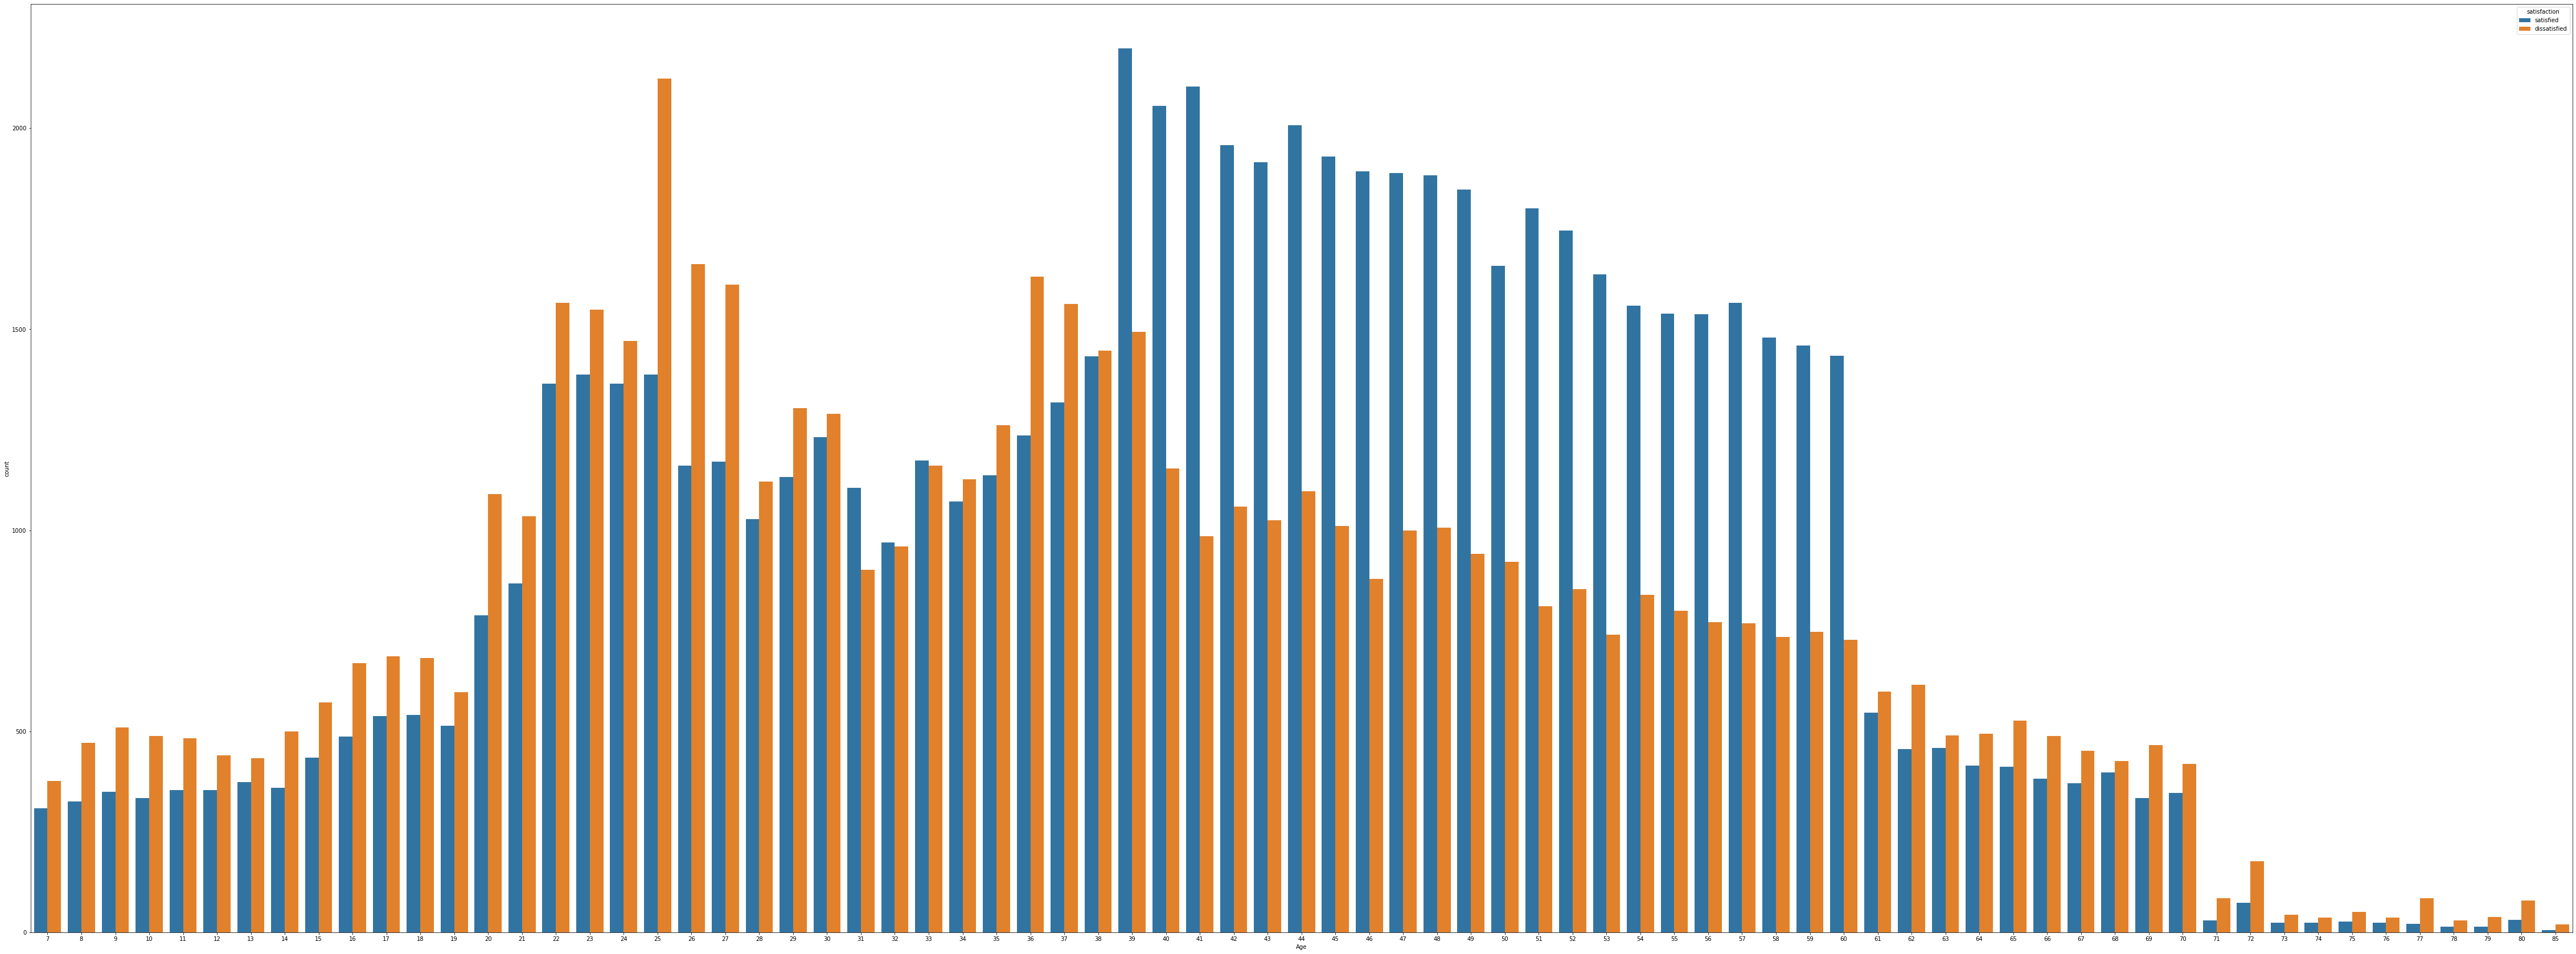

In [58]:
plt.figure(figsize=(80,30))
sns.countplot(x='Age',hue='satisfaction',data=df)

In [51]:
def object_col(df):
    return list(df.select_dtypes(include=object).columns) #function to filter out the categorical values

In [52]:
def numb_col(df): #function to filter out the numerical values
    return list(df.select_dtypes(exclude=object).columns)

In [16]:
cate=object_col(df)
num=numb_col(df)

In [17]:
cate

['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

In [18]:
num

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [19]:
le=LabelEncoder()  #assign variable for label encoder & and normalizer 
ne=Normalizer()

#fit the cateforical value to label endoder to convert categorical values to numerical label

In [20]:
for col in cate:
    df[col]=le.fit_transform(df[col]) #fit the cateforical value to label endoder to convert categorical values to numerical label

In [21]:
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [22]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


#as the numerical value seeems to having a different scale, use normalizer to eliminate the effect of several quantitative features measured on different scales

In [23]:
df[num]=ne.fit_transform(df[num]) #as the numerical value seeems to having a different scale, use normalizer to eliminate the effect of several quantitative features measured on different scales

In [24]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,0.238073,1,1,0.970605,0.0,0.0,0.0,...,0.007325,0.010988,0.010988,0.000000,0.010988,0.018313,0.010988,0.007325,0.000000,0.000000
1,1,1,0,0.018781,1,0,0.984599,0.0,0.0,0.0,...,0.000799,0.001199,0.001598,0.001598,0.001598,0.000799,0.001199,0.000799,0.123874,0.121876
2,1,0,0,0.007016,1,1,0.999965,0.0,0.0,0.0,...,0.000935,0.000935,0.001403,0.001403,0.001871,0.001871,0.001871,0.000935,0.000000,0.000000
3,1,0,0,0.095856,1,1,0.995303,0.0,0.0,0.0,...,0.004793,0.001598,0.001598,0.000000,0.001598,0.006390,0.001598,0.004793,0.000000,0.000000
4,1,0,0,0.193904,1,1,0.980602,0.0,0.0,0.0,...,0.011080,0.005540,0.005540,0.000000,0.005540,0.011080,0.005540,0.013850,0.000000,0.000000


In [25]:
X_data= df.drop(["satisfaction"], axis = 1) 
y_data=df["satisfaction"]#create a y varaiable for dependent variable

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)#spit the data set using train, test split

In [27]:
reg=LogisticRegression()# assign variable to logitic regeression

In [28]:
model=reg.fit(X_train, y_train) #fit the train part to regression model and assign the variable model to it

In [29]:
ypredict=model.predict(X_test) #predict the variable for y dependent variable using X_test

In [30]:
ypredict

array([1, 0, 1, ..., 1, 0, 1])

In [31]:
probs = model.predict_proba(X_test) #use predict proba

In [32]:
probs 

array([[0.14632208, 0.85367792],
       [0.73153233, 0.26846767],
       [0.35089627, 0.64910373],
       ...,
       [0.28429573, 0.71570427],
       [0.87380759, 0.12619241],
       [0.41159833, 0.58840167]])

#returns the class probabilities for each data point.

In [33]:
model_results = pd.DataFrame([ypredict, y_test, [elem[0] for elem in probs], [elem[1] for elem in probs]])
model_results = model_results.T
model_results.rename(columns = {0 : 'PredictedClass', 1 : 'TrueClass', 2 : 'ClassProb:0', 3 : 'ClassProb:1'}, inplace = True)

In [34]:
model_results

,PredictedClass,TrueClass,ClassProb:0,ClassProb:1
0,1.0,1.0,0.146322,0.853678
1,0.0,0.0,0.731532,0.268468
2,1.0,1.0,0.350896,0.649104
3,1.0,1.0,0.149133,0.850867
4,0.0,0.0,0.549789,0.450211
...,...,...,...,...
42856,1.0,1.0,0.255113,0.744887
42857,1.0,0.0,0.353206,0.646794
42858,1.0,1.0,0.284296,0.715704
42859,0.0,0.0,0.873808,0.126192


In [53]:
true_count = 0
for ypredict, real in zip(model_results['PredictedClass'], model_results['TrueClass']):
    if ypredict == real:
        true_count = true_count + 1
print("Number of True Classifications = {0} ".format(true_count))
print("Accurate Classification Ratio = {0} ".format(true_count / len(y_test)))

Number of True Classifications = 32335 
Accurate Classification Ratio = 0.7544154359440983 
